In [2]:
pwd

/scratch/t.cri.ksilliman/CommonG/2019_Mapping/ANGSD_run/HCSS/GWAS


In [2]:
list.of.packages <- c("reshape2","dplyr", "tidyr", "readr", "stringr", "plotly","tidyverse") #add new libraries here 
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

# Load all libraries 
lapply(list.of.packages, FUN = function(X) {
  do.call("require", list(X)) 
})

Loading required package: reshape2
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyr

Attaching package: 'tidyr'

The following object is masked from 'package:reshape2':

    smiths

Loading required package: readr
Loading required package: stringr
Loading required package: plotly
Loading required package: ggplot2

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

Loading required package: tidyverse
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  2.1.3     v forcats 0.4.0
v purrr   0.3.3     
-- Conflicts ------------------------------------------ tidyve

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

# LFMM method  
https://bcm-uga.github.io/lfmm/articles/lfmm  
The R package lfmm implements new algorithms for parameter estimation in latent factor mixed models (LFMM). The algorithms are designed for the correction of unobserved confounders. The new methods are computationally efficient, and provide statistically optimal corrections resulting in improved power and control for false discoveries.

# Formatting phenotype data

In [1]:
library(stringr)
library(tidyverse)
library(lfmm)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v readr   1.3.1  
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v ggplot2 3.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
intable <- read.csv("Common Garden DNA Samples - Adult oysters.csv",
                   )[,c(1,3,4,12,13)]

In [3]:
head(intable)

Population Family Size Wet.weight..g. Width..mm.
1 Oyster Bay 1      1A   3.6            32.62     
2 Oyster Bay 1      1B   3.6            32.62     
3 Oyster Bay 1      2    1.5            23.10     
4 Oyster Bay 1      3    5.0               NA     
5 Oyster Bay 1      4    5.3               NA     
6 Oyster Bay 1      5    4.5            27.25

In [4]:
intable$Population <- c("SS","HC","NF",intable$Population)[match(intable$Population, c("Oyster Bay","Hood Canal","Fidalgo Bay",intable$Population))]

In [5]:
intable$id <- paste(paste0(intable$Population, intable$Family), gsub("[^0-9]","",intable$Size), sep="-")

In [6]:
intable <- intable[,c(4,5,6)]
head(intable)

Wet.weight..g. Width..mm. id   
1 3.6            32.62      SS1-1
2 3.6            32.62      SS1-1
3 1.5            23.10      SS1-2
4 5.0               NA      SS1-3
5 5.3               NA      SS1-4
6 4.5            27.25      SS1-5

In [7]:
inds = as.vector(read.table("../SSHCbams_filt_nreps",header = F))
inds <- inds[,1]
inds <- gsub("\\..*","",inds)
inds <- str_remove(inds,"-L5")
inds <- gsub("[A-Z]$?","",inds)
head(inds)
length(inds)
inds

[1] "HC1-11" "HC1-12" "HC1-13" "HC1-14" "HC1-15" "HC1-18"

[1] 114

[1] "HC1-11" "HC1-12" "HC1-13" "HC1-14" "HC1-15" "HC1-18" "HC1-19" "HC1-2" 
  [9] "HC1-3"  "HC1-4"  "HC1-9"  "HC2-1"  "HC2-10" "HC2-11" "HC2-12" "HC2-13"
 [17] "HC2-14" "HC2-15" "HC2-16" "HC2-17" "HC2-18" "HC2-19" "HC2-2"  "HC2-20"
 [25] "HC2-3"  "HC2-4"  "HC2-5"  "HC2-7"  "HC2-9"  "HC3-1"  "HC3-10" "HC3-11"
 [33] "HC3-12" "HC3-13" "HC3-14" "HC3-16" "HC3-18" "HC3-2"  "HC3-3"  "HC3-4" 
 [41] "HC3-5"  "HC3-6"  "HC3-7"  "HC3-8"  "HC3-9"  "HC4-17" "HC4-1"  "HC4-2" 
 [49] "HC4-4"  "HC4-5"  "HC4-6"  "HC5-10" "HC5-11" "HC5-14" "HC5-15" "HC5-16"
 [57] "HC5-3"  "SS1-1"  "SS1-10" "SS1-12" "SS1-14" "SS1-17" "SS1-19" "SS1-2" 
 [65] "SS1-20" "SS1-5"  "SS1-6"  "SS1-7"  "SS1-8"  "SS2-10" "SS2-12" "SS2-13"
 [73] "SS2-14" "SS2-15" "SS2-16" "SS2-17" "SS2-18" "SS2-19" "SS2-4"  "SS2-5" 
 [81] "SS2-9"  "SS3-1"  "SS3-11" "SS3-13" "SS3-14" "SS3-15" "SS3-16" "SS3-17"
 [89] "SS3-19" "SS3-2"  "SS3-20" "SS3-3"  "SS3-4"  "SS3-5"  "SS3-6"  "SS3-7" 
 [97] "SS3-8"  "SS3-9"  "SS4-1"  "SS4-4"  "SS5-10" "SS5-11" "SS5-12" "SS5-13"
[105] "SS5-15" "SS5-18" "SS5-19" "SS5-3"  "SS5-4"  "SS5-5"  "SS5-6"  "SS5-7" 
[113] "SS5-8"  "SS5-9"

In [8]:
seqs <- intable[which(intable$id %in% inds),]
seqs <- seqs[!duplicated(seqs$id),]
seqs <- seqs[match(inds, seqs$id),]
seqs[, c(1,2)] <- sapply(seqs[, c(1,2)], as.numeric)
dim(seqs)
head(seqs)

[1] 114   3

Wet.weight..g. Width..mm. id    
146 1.9            23.94      HC1-11
147 1.9            18.59      HC1-12
148 1.9            20.83      HC1-13
149 1.6            20.79      HC1-14
150 1.8            19.51      HC1-15
153 1.7            21.97      HC1-18

In [9]:
seqs[is.na(seqs),]

Wet.weight..g. Width..mm. id    
154 NA             17.77      HC1-19

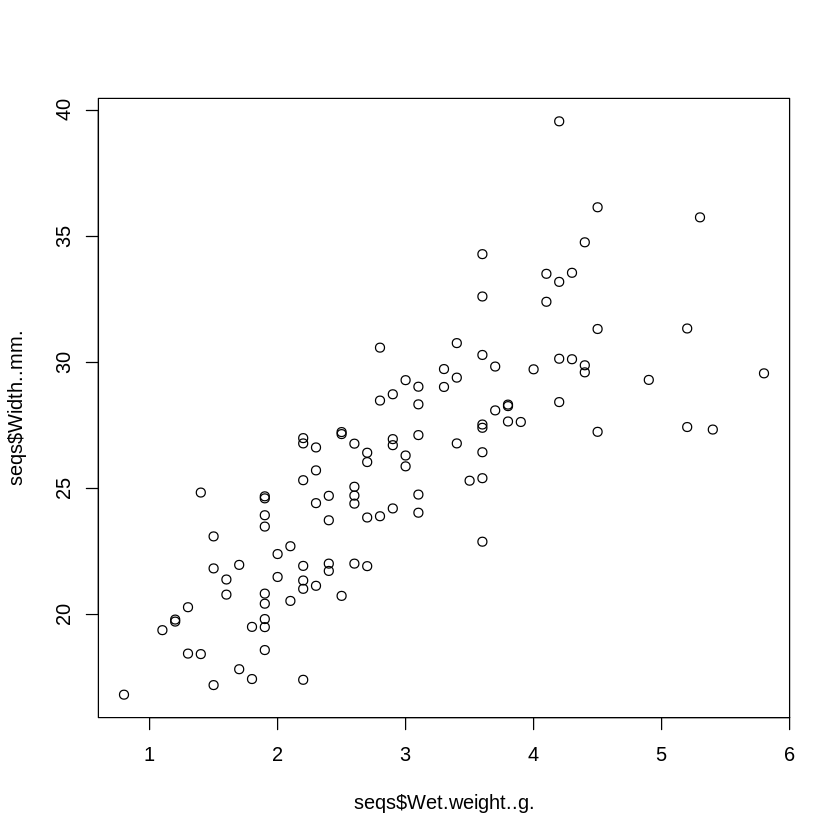

In [10]:
plot(seqs$Wet.weight..g.,seqs$Width..mm.)

# Formatting genotype data  
LFMM requires a matrix with individuals as rows, columns as loci, and 0,1,2 for the # of alleles. Missing genotypes are 9 or -9.  
ANGSD -doGeno 2 makes a matrix with loci as rows, columns as individuals, 0,1,2 and missing genotypes as -1.


In [ ]:
#submitted as job to cluster
FILTERS="-uniqueOnly 1 -remove_bads 1 -minMapQ 20 -minQ 25 -sb_pval 1e-5\
-skipTriallelic 1 -minInd 80 -minIndDepth 3 -snp_pval 1e-3 -minMaf 0.01"

TODOlfmm="-doMajorMinor 1 -doMaf 1 -doCounts 1 -doGeno 2 -doPost 1 \
-doGlf 2 -dosnpstat 1 -postCutoff 0.5"

angsd -b SSHCbams_filt_nreps -GL 1 $FILTERS $TODOlfmm -P 1 -out ../ANGSD_run/HCSS/HCSS_Afilt32m70_01lfmm


In [ ]:
gunzip ../HCSS_Afilt32m70_01lfmm.geno.gz

In [11]:
geno <- read.table("../HCSS_Afilt32m70_01lfmm.geno",header = F)

In [12]:
head(geno)

V1      V2     V3 V4 V5 V6 V7 V8 V9 V10 ... V107 V108 V109 V110 V111 V112
1 Contig0 109103 1  0  2  0  1  1  0  1   ... 0    2    0    1    0    2   
2 Contig0 109119 1  0  2  0  1  0  0  0   ... 0    0    0    0    0    0   
3 Contig0 109120 0  0  0  0  0  0  0  0   ... 0    1    0    0    0    1   
4 Contig0 109123 1  0  2  0  1  0  0  0   ... 0    0    0    0    0    0   
5 Contig1  42880 0  1  0  1  0  0  1  1   ... 0    0    0    0    0    0   
6 Contig3  14914 0  0  0  1  0  0  0  0   ... 1    1    1    1    1    1   
  V113 V114 V115 V116
1 0    1    0    0   
2 0    0    0    0   
3 0    1    0    0   
4 0    0    0    0   
5 0    0    0    0   
6 1    1    0    1

In [13]:
loci <- paste(geno[,1],geno[,2],sep="_")
rownames(geno) <- loci
geno <- geno[,-c(1,2)]
colnames(geno) <- seqs$id
geno <- t(geno)
geno[geno==-1] <- 9

In [14]:
head(geno)

Contig0_109103 Contig0_109119 Contig0_109120 Contig0_109123
HC1-11 1              1              0              1             
HC1-12 0              0              0              0             
HC1-13 2              2              0              2             
HC1-14 0              0              0              0             
HC1-15 1              1              0              1             
HC1-18 1              0              0              0             
       Contig1_42880 Contig3_14914 Contig4_51093 Contig5_121384 Contig8_75328
HC1-11 0             0             0             0              0            
HC1-12 1             0             0             0              0            
HC1-13 0             0             0             1              0            
HC1-14 1             1             0             1              0            
HC1-15 0             0             1             2              0            
HC1-18 0             0             0             2              0            
       Contig9_17749 ... Contig657446_41 Contig657446_47 Contig657446_49
HC1-11 1             ... 1               0               0              
HC1-12 1             ... 1               0               0              
HC1-13 0             ... 0               1               0              
HC1-14 1             ... 1               0               0              
HC1-15 1             ... 0               0               0              
HC1-18 1             ... 1               1               0              
       Contig658520_5162 Contig658520_5426 Contig669985_403 Contig671940_250
HC1-11 1                 1                 0                0               
HC1-12 1                 1                 1                0               
HC1-13 0                 0                 1                0               
HC1-14 1                 1                 0                0               
HC1-15 1                 1                 0                0               
HC1-18 0                 1                 0                0               
       Contig674034_1460 Contig676684_821 Contig676684_836
HC1-11 0                 0                1               
HC1-12 2                 0                0               
HC1-13 0                 0                0               
HC1-14 0                 0                1               
HC1-15 0                 0                1               
HC1-18 0                 2                0

In [15]:
seqs <- seqs[-which(seqs$id=="HC1-19"),]
dim(seqs)

[1] 113   3

In [16]:
geno <- geno[!rownames(geno) == "HC1-19",]
dim(geno)

[1]  113 5269

## PCA on genotype data

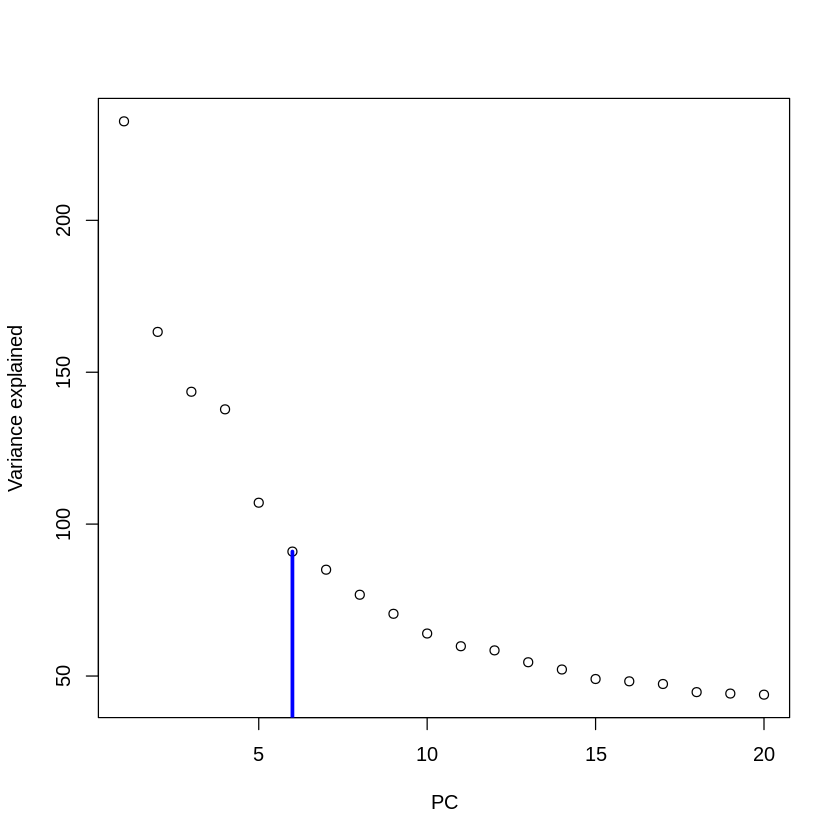

In [20]:
Y <- geno
pc <- prcomp(Y)
plot(pc$sdev[1:20]^2, xlab = 'PC', ylab = "Variance explained")
points(6,pc$sdev[6]^2, type = "h", lwd = 3, col = "blue")

K = 6 components in data, so use K=6 latent factors in model.

# Width
## Ridge estimates and GWAS with lfmm

In [25]:
X <- as.data.frame(seqs$Width..mm.)

In [26]:
colnames(X) <- "Width"
head(X)

Width
1 23.94
2 18.59
3 20.83
4 20.79
5 19.51
6 21.97

In [96]:
?lfmm_test

In [27]:
## Fit an LFMM, i.e, compute B, U, V estimates
mod.lfmm.ridge <- lfmm_ridge(Y = Y, 
                        X = X, 
                        K = 6)

In [28]:
## performs association testing using the fitted model:
 pv_ridge <- lfmm_test(Y = Y, 
                 X = X, 
                 lfmm = mod.lfmm.ridge, 
                 calibrate = "gif")

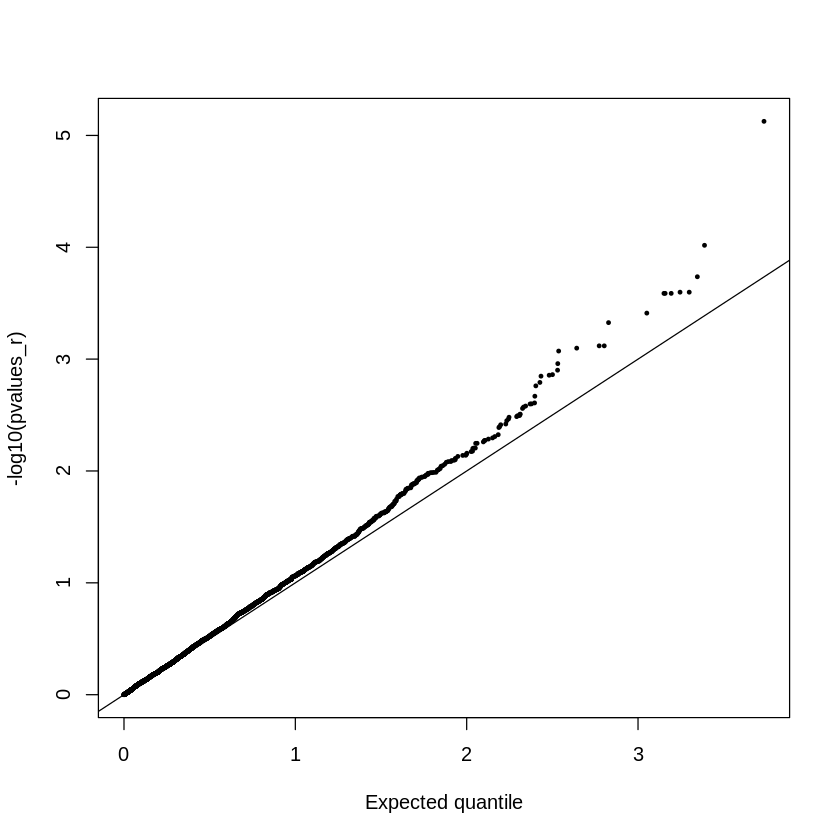

In [29]:
pvalues_r <- pv_ridge$calibrated.pvalue 
qqplot(rexp(length(pvalues_r), rate = log(10)),
       -log10(pvalues_r), xlab = "Expected quantile",
       pch = 19, cex = .4)
abline(0,1)

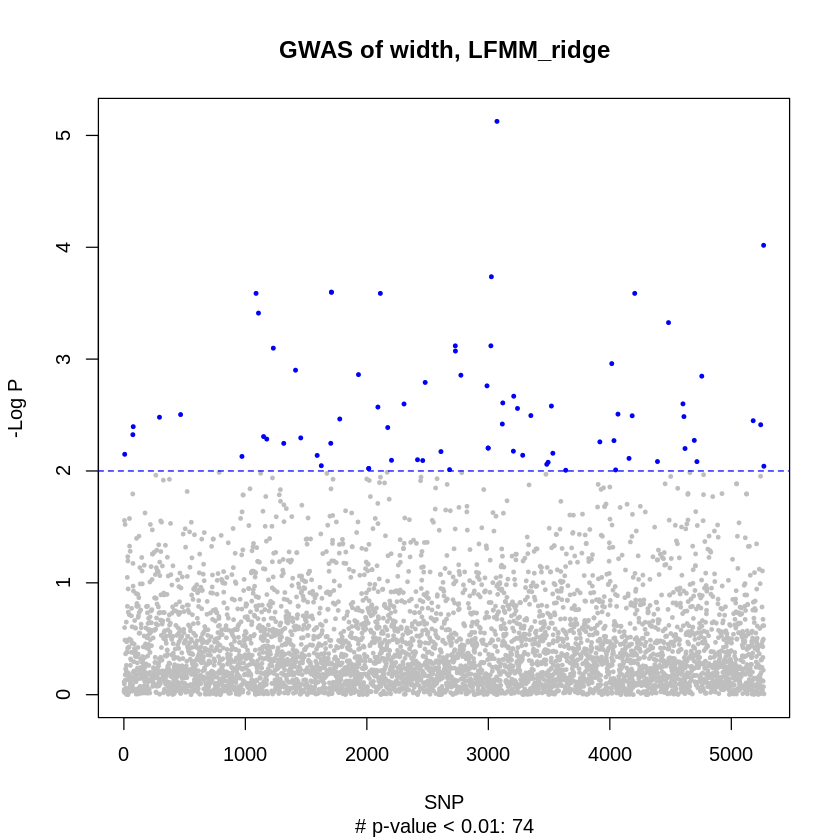

In [30]:
## Manhattan plot
x <- 1:length(pvalues_r)

plot(-log10(pvalues_r), 
      pch = 19, 
      cex = .4, 
      xlab = "SNP", ylab = "-Log P",
      col = "grey")

abline(h=-log10(0.01), col="blue", lty="dashed")
keep <- pvalues_r < 0.01
keep[which(is.na(keep))] <- FALSE
ridgeP01 <- x[keep]
title("GWAS of width, LFMM_ridge",
      sub=paste0("# p-value < 0.01: ",as.character(length(ridgeP01))))
points(ridgeP01,-log10(pvalues_r[keep]), pch=19,cex=.4,col="blue")


In [155]:
pwd

/scratch/t.cri.ksilliman/CommonG/2019_Mapping/ANGSD_run/HCSS/GWAS


In [250]:
write.table(pvalues_r,"GWAS_width_lfmmRidge.pvalues",row.names = T, col.names = T)

## Lasso estimates and GWAS with lfmm
More liberal test

In [31]:
# Fit an LFMM, i.e, compute B, U, V estimates
 mod.lfmm.lasso <- lfmm_lasso(Y = Y, 
                        X = X, 
                        K = 6,
                        nozero.prop = 0.01)

It = 1/100, err2 = 0.643349159118944
It = 2/100, err2 = 0.577648236080479
It = 3/100, err2 = 0.577787402193472
It = 4/100, err2 = 0.577816495679895
It = 5/100, err2 = 0.577819839713709
=== lambda = 0.140940082001527, no zero B proportion = 0.00227747200607326
It = 1/100, err2 = 0.577820259673722
It = 2/100, err2 = 0.577770612587054
It = 3/100, err2 = 0.577764500031541
It = 4/100, err2 = 0.577763717557962
=== lambda = 0.13453413775635, no zero B proportion = 0.00322641867527045
It = 1/100, err2 = 0.577763615370204
It = 2/100, err2 = 0.577708155531622
It = 3/100, err2 = 0.577701581604339
It = 4/100, err2 = 0.577700768664162
=== lambda = 0.128419353563654, no zero B proportion = 0.00322641867527045
It = 1/100, err2 = 0.577700665807883
It = 2/100, err2 = 0.577651170467114
It = 3/100, err2 = 0.577645318097132
It = 4/100, err2 = 0.577644562990186
=== lambda = 0.122582495749696, no zero B proportion = 0.00379578667678876
It = 1/100, err2 = 0.577644459788369
It = 2/100, err2 = 0.57758551486037

In [32]:
## performs association testing using the fitted model:
 pv <- lfmm_test(Y = Y, 
                 X = X, 
                 lfmm = mod.lfmm.lasso, 
                 calibrate = "gif")

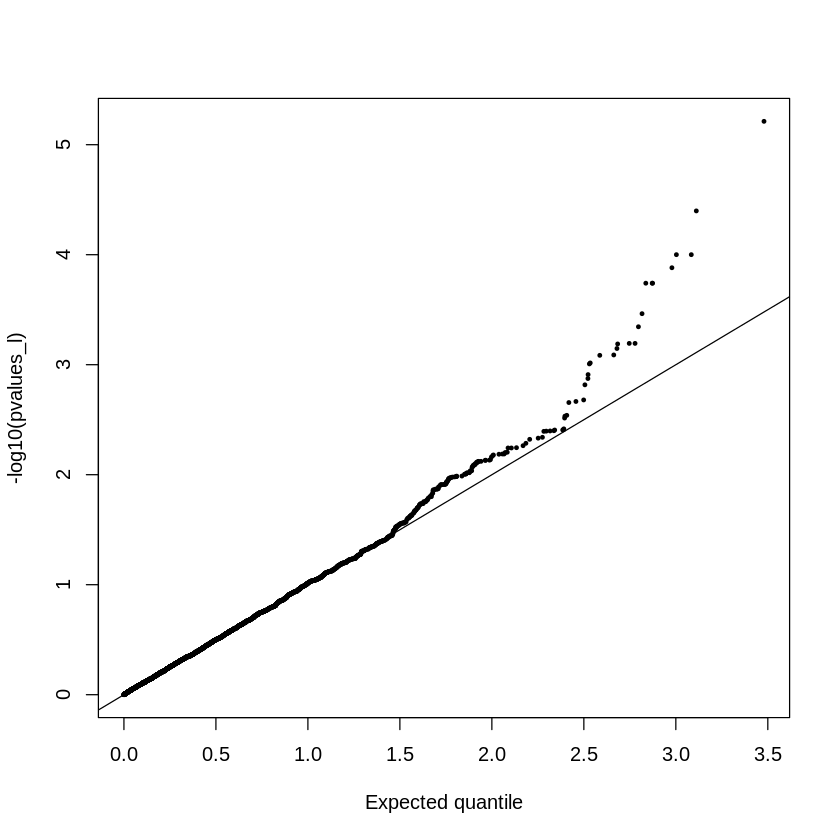

In [33]:
pvalues_l <- pv$calibrated.pvalue 
qqplot(rexp(length(pvalues_l), rate = log(10)),
       -log10(pvalues_l), xlab = "Expected quantile",
       pch = 19, cex = .4)
abline(0,1)

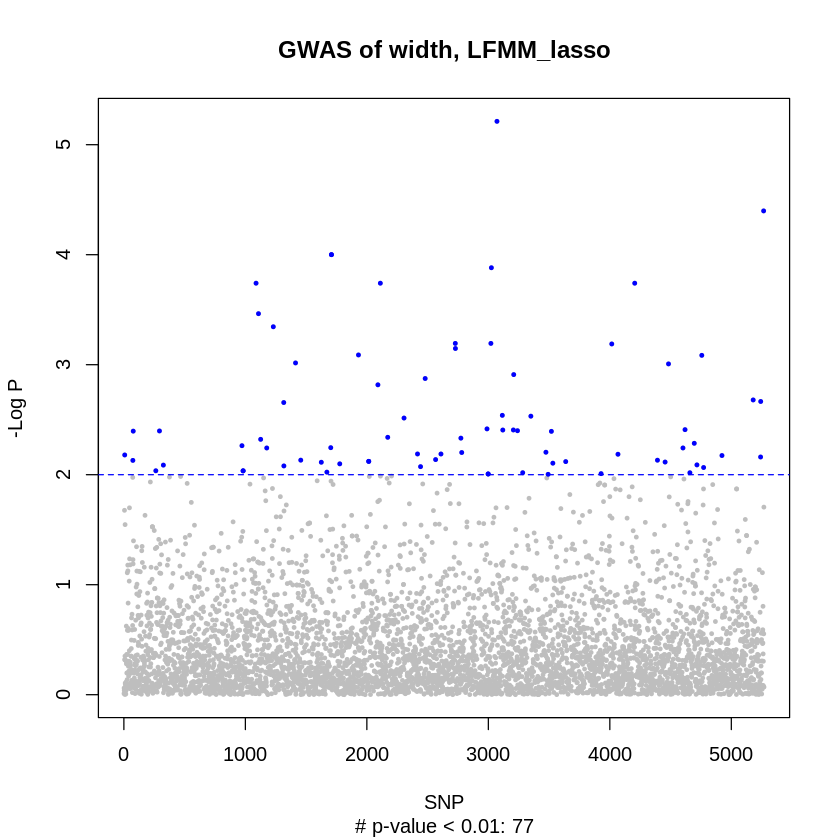

In [34]:
## Manhattan plot
xL <- 1:length(pvalues_l)

plot(-log10(pvalues_l), 
      pch = 19, 
      cex = .4, 
      xlab = "SNP", ylab = "-Log P",
      col = "grey")

abline(h=-log10(0.01), col="blue", lty="dashed")
keep <- pvalues_l < 0.01
keep[which(is.na(keep))] <- FALSE
lassoP01 <- xL[keep]
title("GWAS of width, LFMM_lasso",
      sub=paste0("# p-value < 0.01: ",as.character(length(lassoP01))))
points(lassoP01,-log10(pvalues_l[keep]), pch=19,cex=.4,col="blue")


In [255]:
write.table(pvalues_l,"GWAS_width_lfmmLasso.pvalues",row.names = T, col.names = T)

In [256]:
#SNPs identified by both methods 
both = intersect(rownames(pvalues_l)[lassoP01],rownames(pvalues_r)[ridgeP01])
write.table(both,"GWAS_width_lfmmBothP01.pvalues",row.names = T, col.names = T)
length(both)
both

[1] 60

[1] "Contig4_51093"      "Contig247_19705"    "Contig261_13875"   
 [4] "Contig1752_7704"    "Contig18776_51"     "Contig20301_25778" 
 [7] "Contig20556_1169"   "Contig21828_42443"  "Contig22630_12762" 
[10] "Contig23953_13742"  "Contig25187_18688"  "Contig25811_8609"  
[13] "Contig28385_4082"   "Contig29300_18485"  "Contig29459_8886"  
[16] "Contig29459_8891"   "Contig30657_15625"  "Contig33340_10312" 
[19] "Contig34886_12977"  "Contig34886_12978"  "Contig36003_1403"  
[22] "Contig36326_22771"  "Contig37341_12397"  "Contig39792_8879"  
[25] "Contig42157_9907"   "Contig43024_5264"   "Contig45429_5191"  
[28] "Contig47156_8140"   "Contig47156_8144"   "Contig47842_5739"  
[31] "Contig52538_1318"   "Contig52768_7192"   "Contig52768_7196"  
[34] "Contig53370_3575"   "Contig53438_8766"   "Contig54957_15652" 
[37] "Contig55737_10139"  "Contig55818_10082"  "Contig58197_4188"  
[40] "Contig58213_2334"   "Contig58976_2566"   "Contig60108_2787"  
[43] "Contig61792_3239"   "Contig65363_107"    "Contig65681_10897" 
[46] "Contig65982_869"    "Contig69228_5078"   "Contig83091_64"    
[49] "Contig84975_13331"  "Contig93748_2190"   "Contig104078_662"  
[52] "Contig109827_6152"  "Contig120378_211"   "Contig122227_2746" 
[55] "Contig130869_2254"  "Contig133037_13105" "Contig135601_12809"
[58] "Contig321245_77"    "Contig538871_5542"  "Contig671940_250"

In [257]:
#SNPs identified by at least 1 methods 
un = union(rownames(pvalues_l)[lassoP01],rownames(pvalues_r)[ridgeP01])
write.table(un,"GWAS_width_lfmmUnionP01.pvalues",row.names = T, col.names = T)
length(un)

[1] 91

## Annotating GWAS locations

In [69]:
chr <- sapply(strsplit(rownames(pvalues_l)[lassoP01],"_"), `[`, 1)
start <- sapply(strsplit(rownames(pvalues_l)[lassoP01],"_"), `[`, 2)
end <- start
bed <- cbind(chr,start,end)
write.table(bed,"GWAS_width_lfmmLassoP01.tab",row.names = F, col.names = F,quote = F, sep = "\t")

In [54]:
module load gcc/6.2.0
module load bedtools/2.29.0

In [65]:
intersectBed \
  -wb \
  -a "../../../genome-features/Olurida_v081-20190709.gene.gff" \
  -b "GWAS_width_lfmmLassoP01.tab" \
  > "GWAS_width_lfmmLassoP01.genes"

In [66]:
head -n 2 GWAS_width_lfmmLassoP01.genes

Contig60108	maker	gene	2787	2788	.	-	.	ID=OLUR_00014779;Name=OLUR_00014779;Alias=maker-Contig60108-snap-gene-0.2;Note=Similar to MLH3: DNA mismatch repair protein Mlh3 (Homo sapiens OX%3D9606);Dbxref=Gene3D:G3DSA:3.30.230.10,Gene3D:G3DSA:3.30.565.10,InterPro:IPR013507,InterPro:IPR014721,InterPro:IPR020568,InterPro:IPR036890,MobiDBLite:mobidb-lite,Pfam:PF01119,SMART:SM01340,SUPERFAMILY:SSF54211,SUPERFAMILY:SSF55874;Ontology_term=GO:0005524,GO:0006298,GO:0030983;	Contig60108	2787	2787
Contig42157	maker	gene	9907	9908	.	-	.	ID=OLUR_00019115;Name=OLUR_00019115;Alias=snap_masked-Contig42157-processed-gene-0.0;Note=Protein of unknown function;Dbxref=Coils:Coil,MobiDBLite:mobidb-lite;	Contig42157	9907	9907


In [67]:
wc -l GWAS_width_lfmmLassoP01.genes

32 GWAS_width_lfmmLassoP01.genes


### 32 GWAS snps found in genes (29 unique genes)

In [58]:
bedtools window \
-w 2000 \
-a "../../../genome-features/Olurida_v081-20190709.gene.gff" \
-b "GWAS_width_lfmmLassoP01.tab" \
> "GWAS_width_lfmmLassoP01.genes2kb"

In [62]:
head -n 2 GWAS_width_lfmmLassoP01.genes2kb

Contig60108	maker	gene	41	11731	.	-	.	ID=OLUR_00014779;Name=OLUR_00014779;Alias=maker-Contig60108-snap-gene-0.2;Note=Similar to MLH3: DNA mismatch repair protein Mlh3 (Homo sapiens OX%3D9606);Dbxref=Gene3D:G3DSA:3.30.230.10,Gene3D:G3DSA:3.30.565.10,InterPro:IPR013507,InterPro:IPR014721,InterPro:IPR020568,InterPro:IPR036890,MobiDBLite:mobidb-lite,Pfam:PF01119,SMART:SM01340,SUPERFAMILY:SSF54211,SUPERFAMILY:SSF55874;Ontology_term=GO:0005524,GO:0006298,GO:0030983;	Contig60108	2787	2787
Contig42157	maker	gene	2034	10762	.	-	.	ID=OLUR_00019115;Name=OLUR_00019115;Alias=snap_masked-Contig42157-processed-gene-0.0;Note=Protein of unknown function;Dbxref=Coils:Coil,MobiDBLite:mobidb-lite;	Contig42157	9907	9907


In [60]:
wc -l GWAS_width_lfmmLassoP01.genes2kb

40 GWAS_width_lfmmLassoP01.genes2kb


### 40 GWAS snps found in genes + 2kb up/downstream (37 unique)

#### Extract GO Terms

In [3]:
genes <- 
  read_delim(file = "GWAS_width_lfmmLassoP01.genes", delim = "\t", col_names = c("contig_gene", "source_gene", "feature_gene", "start_gene", "end_gene", "unknown1_gene", "strand_gene", "unknown2_gene", "notes_gene","chr","start","end")) %>%
  mutate(gene=paste(contig_gene, start_gene, end_gene, sep="_"))

Parsed with column specification:
cols(
  contig_gene = col_character(),
  source_gene = col_character(),
  feature_gene = col_character(),
  start_gene = col_double(),
  end_gene = col_double(),
  unknown1_gene = col_character(),
  strand_gene = col_character(),
  unknown2_gene = col_character(),
  notes_gene = col_character(),
  chr = col_character(),
  start = col_double(),
  end = col_double()
)


In [13]:
dim(genes[!duplicated(genes[,'Name']),])


[1] 29 22

In [4]:
# split gene data in "notes_gene" column into separate columns 
genes <- genes %>%
  mutate(ID=str_extract(notes_gene, "ID=(.*?);"),
       Parent=str_extract(notes_gene, "Parent=(.*?);"),
       Name=str_extract(notes_gene, "Name=(.*?);"),
       Alias=str_extract(notes_gene, "Alias=(.*?);"),
       AED=str_extract(notes_gene, "AED=(.*?);"),
       eAED=str_extract(notes_gene, "eAED=(.*?);"),
       Note=str_extract(notes_gene, "Note=(.*?);"),
       Ontology_term=str_extract(notes_gene, "Ontology_term=(.*?);"),
       Dbxref=str_extract(notes_gene, "Dbxref=(.*?);")
       )

#Extract GO terms 
genes.GO <- genes %>%
  mutate(Ontology_term = str_replace(Ontology_term, pattern="Ontology_term=",replacement = "")) %>%
  mutate(Ontology_term = str_replace(Ontology_term, pattern=";",replacement = "")) %>%
  separate(Ontology_term, sep=",", into=paste("GO", 1:11, sep="_")) %>%
  pivot_longer(cols=c("GO_1","GO_2","GO_3","GO_4","GO_5","GO_6","GO_7","GO_8","GO_9","GO_10","GO_11"), names_to = "GO_number", values_to = "GO_term") %>%
  dplyr::select(-GO_number) %>%
  filter(!is.na(Note) & !is.na(GO_term))

Warning message:
"Expected 11 pieces. Missing pieces filled with `NA` in 15 rows [1, 3, 5, 8, 13, 15, 17, 20, 22, 23, 25, 26, 30, 31, 32]."

In [5]:
genes.GO

contig_gene source_gene feature_gene start_gene end_gene unknown1_gene
1  Contig60108 maker       gene          2787       2788    .            
2  Contig60108 maker       gene          2787       2788    .            
3  Contig60108 maker       gene          2787       2788    .            
4  Contig58976 maker       gene          2566       2567    .            
5  Contig58976 maker       gene          2566       2567    .            
6  Contig58976 maker       gene          2566       2567    .            
7  Contig52538 maker       gene          1318       1319    .            
8  Contig52538 maker       gene          1318       1319    .            
9  Contig52538 maker       gene          1318       1319    .            
10 Contig47979 maker       gene           280        281    .            
11 Contig47979 maker       gene           280        281    .            
12 Contig47979 maker       gene           280        281    .            
13 Contig47979 maker       gene           280        281    .            
14 Contig65681 maker       gene         10897      10898    .            
15 Contig45429 maker       gene          5191       5192    .            
16 Contig58213 maker       gene          2334       2335    .            
17 Contig58213 maker       gene          2334       2335    .            
18 Contig58213 maker       gene          2334       2335    .            
19 Contig58213 maker       gene          2334       2335    .            
20 Contig37341 maker       gene         12397      12398    .            
21 Contig25811 maker       gene          8609       8610    .            
22 Contig36326 maker       gene         22771      22772    .            
23 Contig36326 maker       gene         22771      22772    .            
24 Contig36326 maker       gene         22771      22772    .            
25 Contig42415 maker       gene         11194      11195    .            
26 Contig42415 maker       gene         11194      11195    .            
27 Contig20301 maker       gene         25778      25779    .            
28 Contig20301 maker       gene         25778      25779    .            
29 Contig20301 maker       gene         25778      25779    .            
30 Contig20301 maker       gene         25778      25779    .            
31 Contig20301 maker       gene         25778      25779    .            
32 Contig20301 maker       gene         25778      25779    .            
33 Contig20301 maker       gene         25778      25779    .            
34 Contig43024 maker       gene          5264       5265    .            
35 Contig43024 maker       gene          5264       5265    .            
36 Contig43024 maker       gene          5264       5265    .            
37 Contig43024 maker       gene          5264       5265    .            
38 Contig43024 maker       gene          5264       5265    .            
39 Contig52768 maker       gene          7192       7193    .            
40 Contig52768 maker       gene          7192       7193    .            
41 Contig52768 maker       gene          7192       7193    .            
42 Contig52768 maker       gene          7196       7197    .            
43 Contig52768 maker       gene          7196       7197    .            
44 Contig52768 maker       gene          7196       7197    .            
   strand_gene unknown2_gene
1  -           .            
2  -           .            
3  -           .            
4  -           .            
5  -           .            
6  -           .            
7  -           .            
8  -           .            
9  -           .            
10 +           .            
11 +           .            
12 +           .            
13 +           .            
14 -           .            
15 +           .            
16 -           .            
17 -           .            
18 -           .            
19 -           .            
20 -           .            
21 -           .            
22 +           .            
23 +  

In [8]:
write_delim(genes.GO[,c("GO_term")], path = "GWAS.GO.txt", delim = '\t', col_names = F) #write out df with just GO terms and p-adj values 

### GOs from genes+2kb

In [18]:
genes2kb <- 
  read_delim(file = "GWAS_width_lfmmLassoP01.genes2kb", delim = "\t", col_names = c("contig_gene", "source_gene", "feature_gene", "start_gene", "end_gene", "unknown1_gene", "strand_gene", "unknown2_gene", "notes_gene","chr","start","end")) %>%
  mutate(gene=paste(contig_gene, start_gene, end_gene, sep="_"))

Parsed with column specification:
cols(
  contig_gene = col_character(),
  source_gene = col_character(),
  feature_gene = col_character(),
  start_gene = col_double(),
  end_gene = col_double(),
  unknown1_gene = col_character(),
  strand_gene = col_character(),
  unknown2_gene = col_character(),
  notes_gene = col_character(),
  chr = col_character(),
  start = col_double(),
  end = col_double()
)


In [19]:
# split gene data in "notes_gene" column into separate columns 
genes2kb <- genes2kb %>%
  mutate(ID=str_extract(notes_gene, "ID=(.*?);"),
       Parent=str_extract(notes_gene, "Parent=(.*?);"),
       Name=str_extract(notes_gene, "Name=(.*?);"),
       Alias=str_extract(notes_gene, "Alias=(.*?);"),
       AED=str_extract(notes_gene, "AED=(.*?);"),
       eAED=str_extract(notes_gene, "eAED=(.*?);"),
       Note=str_extract(notes_gene, "Note=(.*?);"),
       Ontology_term=str_extract(notes_gene, "Ontology_term=(.*?);"),
       Dbxref=str_extract(notes_gene, "Dbxref=(.*?);")
       )

#Extract GO terms 
genes2kb.GO <- genes2kb %>%
  mutate(Ontology_term = str_replace(Ontology_term, pattern="Ontology_term=",replacement = "")) %>%
  mutate(Ontology_term = str_replace(Ontology_term, pattern=";",replacement = "")) %>%
  separate(Ontology_term, sep=",", into=paste("GO", 1:11, sep="_")) %>%
  pivot_longer(cols=c("GO_1","GO_2","GO_3","GO_4","GO_5","GO_6","GO_7","GO_8","GO_9","GO_10","GO_11"), names_to = "GO_number", values_to = "GO_term") %>%
  dplyr::select(-GO_number) %>%
  filter(!is.na(Note) & !is.na(GO_term))

Warning message:
"Expected 11 pieces. Missing pieces filled with `NA` in 18 rows [1, 3, 4, 6, 9, 12, 17, 19, 22, 24, 28, 30, 31, 33, 34, 38, 39, 40]."

In [20]:
dim(genes2kb[!duplicated(genes2kb[,'Name']),])


[1] 37 22

In [21]:
genes2kb.GO

contig_gene source_gene feature_gene start_gene end_gene unknown1_gene
1  Contig60108 maker       gene            41      11731    .            
2  Contig60108 maker       gene            41      11731    .            
3  Contig60108 maker       gene            41      11731    .            
4  Contig58976 maker       gene           224       2577    .            
5  Contig58976 maker       gene           224       2577    .            
6  Contig58976 maker       gene           224       2577    .            
7  Contig58976 maker       gene          3992      11574    .            
8  Contig52538 maker       gene           133      15457    .            
9  Contig52538 maker       gene           133      15457    .            
10 Contig52538 maker       gene           133      15457    .            
11 Contig65982 maker       gene            27        404    .            
12 Contig47979 maker       gene            80       3696    .            
13 Contig47979 maker       gene            80       3696    .            
14 Contig47979 maker       gene            80       3696    .            
15 Contig47979 maker       gene            80       3696    .            
16 Contig65681 maker       gene          7960      11565    .            
17 Contig45429 maker       gene           411       9549    .            
18 Contig20866 maker       gene            35      14729    .            
19 Contig58213 maker       gene           681      25098    .            
20 Contig58213 maker       gene           681      25098    .            
21 Contig58213 maker       gene           681      25098    .            
22 Contig58213 maker       gene           681      25098    .            
23 Contig37341 maker       gene         12182      18392    .            
24 Contig25811 maker       gene          2447      39587    .            
25 Contig36326 maker       gene           923      26730    .            
26 Contig36326 maker       gene           923      26730    .            
27 Contig36326 maker       gene           923      26730    .            
28 Contig42415 maker       gene          1769      14639    .            
29 Contig42415 maker       gene          1769      14639    .            
30 Contig20301 maker       gene          6169      26392    .            
31 Contig20301 maker       gene          6169      26392    .            
32 Contig20301 maker       gene          6169      26392    .            
33 Contig20301 maker       gene          6169      26392    .            
34 Contig20301 maker       gene          6169      26392    .            
35 Contig20301 maker       gene          6169      26392    .            
36 Contig20301 maker       gene          6169      26392    .            
37 Contig43024 maker       gene           444       6767    .            
38 Contig43024 maker       gene           444       6767    .            
39 Contig43024 maker       gene           444       6767    .            
40 Contig43024 maker       gene           444       6767    .            
41 Contig43024 maker       gene           444       6767    .            
42 Contig52768 maker       gene          2124      12120    .            
43 Contig52768 maker       gene          2124      12120    .            
44 Contig52768 maker       gene          2124      12120    .            
45 Contig52768 maker       gene          2124      12120    .            
46 Contig52768 maker       gene          2124      12120    .            
47 Contig52768 maker       gene          2124      12120    .            
   strand_gene unknown2_gene
1  -           .            
2  -           .            
3  -           .            
4  -           .            
5  -           .            
6  -           .            
7  -           .            
8  -           .            
9  -           .            
10 -           .            
11 +           .            
12 +           .            
13 +           .            
14 +           .            
15 +           .

In [22]:
write_delim(genes2kb.GO[,c("GO_term")], path = "GWAS2kb.GO.txt", delim = '\t', col_names = F) 

#### REVIGO genes+2kb

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.
Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.


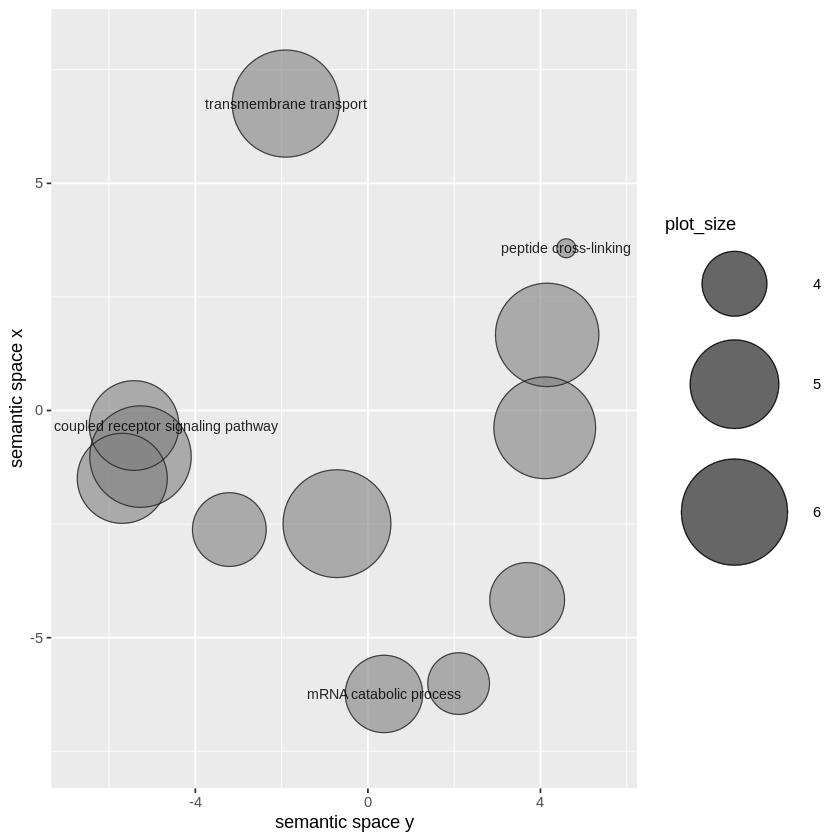

In [34]:


# A plotting R script produced by the REVIGO server at http://revigo.irb.hr/
# If you found REVIGO useful in your work, please cite the following reference:
# Supek F et al. "REVIGO summarizes and visualizes long lists of Gene Ontology
# terms" PLoS ONE 2011. doi:10.1371/journal.pone.0021800


# --------------------------------------------------------------------------
# If you don't have the ggplot2 package installed, uncomment the following line:
# install.packages( "ggplot2" );
library( ggplot2 );
library( colorspace);
# --------------------------------------------------------------------------
# If you don't have the scales package installed, uncomment the following line:
# install.packages( "scales" );
library( scales );


# --------------------------------------------------------------------------
# Here is your data from REVIGO. Scroll down for plot configuration options.

revigo.names <- c("term_ID","description","frequency_%","plot_X","plot_Y","plot_size","uniqueness","dispensability");
revigo.data <- rbind(c("GO:0018149","peptide cross-linking", 0.013, 4.598, 3.571, 3.234,0.672,0.000),
c("GO:0055085","transmembrane transport", 8.916,-1.904, 6.755, 6.058,0.854,0.000),
c("GO:0007186","G-protein coupled receptor signaling pathway", 0.882,-5.420,-0.331, 5.054,0.466,0.024),
c("GO:0006402","mRNA catabolic process", 0.232, 0.373,-6.239, 4.475,0.633,0.094),
c("GO:0070897","DNA-templated transcriptional preinitiation complex assembly", 0.062, 2.103,-6.011, 3.899,0.626,0.229),
c("GO:0009190","cyclic nucleotide biosynthetic process", 0.182, 3.691,-4.170, 4.369,0.597,0.241),
c("GO:0006298","mismatch repair", 0.165,-3.212,-2.621, 4.326,0.464,0.381),
c("GO:0006468","protein phosphorylation", 4.137, 4.099,-0.381, 5.725,0.557,0.390),
c("GO:0006355","regulation of transcription, DNA-templated", 9.917,-0.717,-2.491, 6.105,0.366,0.412),
c("GO:0006508","proteolysis", 5.223, 4.155, 1.664, 5.826,0.659,0.448),
c("GO:0007166","cell surface receptor signaling pathway", 0.920,-5.693,-1.493, 5.072,0.465,0.538),
c("GO:0035556","intracellular signal transduction", 4.000,-5.271,-1.015, 5.710,0.418,0.641));

one.data <- data.frame(revigo.data);
names(one.data) <- revigo.names;
one.data <- one.data [(one.data$plot_X != "null" & one.data$plot_Y != "null"), ];
one.data$plot_X <- as.numeric( as.character(one.data$plot_X) );
one.data$plot_Y <- as.numeric( as.character(one.data$plot_Y) );
one.data$plot_size <- as.numeric( as.character(one.data$plot_size) );
#one.data$log10_p_value <- as.numeric( as.character(one.data$log10_p_value) );
one.data$frequency <- as.numeric( as.character(one.data$frequency) );
one.data$uniqueness <- as.numeric( as.character(one.data$uniqueness) );
one.data$dispensability <- as.numeric( as.character(one.data$dispensability) );
#head(one.data);


# --------------------------------------------------------------------------
# Names of the axes, sizes of the numbers and letters, names of the columns,
# etc. can be changed below

p1 <- ggplot( data = one.data );
p1 <- p1 + geom_point( aes( plot_X, plot_Y, colour = uniqueness, size = plot_size), alpha = I(0.6) ) + scale_size_area();
p1 <- p1 + scale_colour_gradientn( colours = c("blue", "green", "yellow", "red"), limits = c( min(one.data$uniqueness), 0) );
p1 <- p1 + geom_point( aes(plot_X, plot_Y, size = plot_size), shape = 21, fill = "transparent", colour = I (alpha ("black", 0.6) )) + scale_size_area();
p1 <- p1 + scale_size( range=c(5, 30))  + scale_fill_gradientn(colours = heat_hcl(7), limits = c(-300, 0) );
ex <- one.data [ one.data$dispensability < 0.15, ]; 
p1 <- p1 + geom_text( data = ex, aes(plot_X, plot_Y, label = description), colour = I(alpha("black", 0.85)), size = 3 );
p1 <- p1 + labs (y = "semantic space x", x = "semantic space y");
p1 <- p1 + theme(legend.key = element_blank()) ;
one.x_range = max(one.data$plot_X) - min(one.data$plot_X);
one.y_range = max(one.data$plot_Y) - min(one.data$plot_Y);
p1 <- p1 + xlim(min(one.data$plot_X)-one.x_range/10,max(one.data$plot_X)+one.x_range/10);
p1 <- p1 + ylim(min(one.data$plot_Y)-one.y_range/10,max(one.data$plot_Y)+one.y_range/10);



# --------------------------------------------------------------------------
# Output the plot to screen

p1;

# Uncomment the line below to also save the plot to a file.
# The file type depends on the extension (default=pdf).

# ggsave("C:/Users/path_to_your_file/revigo-plot.pdf");

In [35]:
one.data

term_ID    description                                                 
1  GO:0018149 peptide cross-linking                                       
2  GO:0055085 transmembrane transport                                     
3  GO:0007186 G-protein coupled receptor signaling pathway                
4  GO:0006402 mRNA catabolic process                                      
5  GO:0070897 DNA-templated transcriptional preinitiation complex assembly
6  GO:0009190 cyclic nucleotide biosynthetic process                      
7  GO:0006298 mismatch repair                                             
8  GO:0006468 protein phosphorylation                                     
9  GO:0006355 regulation of transcription, DNA-templated                  
10 GO:0006508 proteolysis                                                 
11 GO:0007166 cell surface receptor signaling pathway                     
12 GO:0035556 intracellular signal transduction                           
   frequency_% plot_X plot_Y plot_size uniqueness dispensability frequency
1  0.013        4.598  3.571 3.234     0.672      0.000          0.013    
2  8.916       -1.904  6.755 6.058     0.854      0.000          8.916    
3  0.882       -5.420 -0.331 5.054     0.466      0.024          0.882    
4  0.232        0.373 -6.239 4.475     0.633      0.094          0.232    
5  0.062        2.103 -6.011 3.899     0.626      0.229          0.062    
6  0.182        3.691 -4.170 4.369     0.597      0.241          0.182    
7  0.165       -3.212 -2.621 4.326     0.464      0.381          0.165    
8  4.137        4.099 -0.381 5.725     0.557      0.390          4.137    
9  9.917       -0.717 -2.491 6.105     0.366      0.412          9.917    
10 5.223        4.155  1.664 5.826     0.659      0.448          5.223    
11 0.92        -5.693 -1.493 5.072     0.465      0.538          0.920    
12 4           -5.271 -1.015 5.710     0.418      0.641          4.000

# Wet.weight

In [258]:
X <- as.data.frame(seqs$Wet.weight..g.)

In [259]:
colnames(X) <- "Wet.weight"
head(X)

Wet.weight
1 1.9       
2 1.9       
3 1.9       
4 1.6       
5 1.8       
6 1.7

In [96]:
?lfmm_test

In [260]:
## Fit an LFMM, i.e, compute B, U, V estimates
mod.lfmm.ridge <- lfmm_ridge(Y = Y, 
                        X = X, 
                        K = 6)

In [261]:
## performs association testing using the fitted model:
 pv_ridge <- lfmm_test(Y = Y, 
                 X = X, 
                 lfmm = mod.lfmm.ridge, 
                 calibrate = "gif")

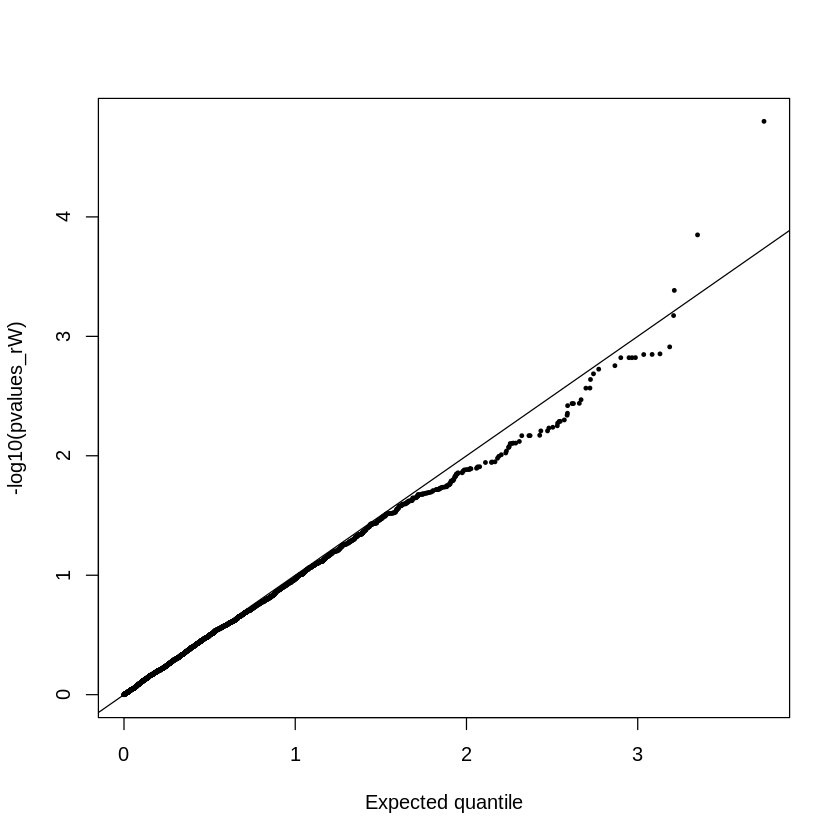

In [262]:
pvalues_rW <- pv_ridge$calibrated.pvalue 
qqplot(rexp(length(pvalues_rW), rate = log(10)),
       -log10(pvalues_rW), xlab = "Expected quantile",
       pch = 19, cex = .4)
abline(0,1)

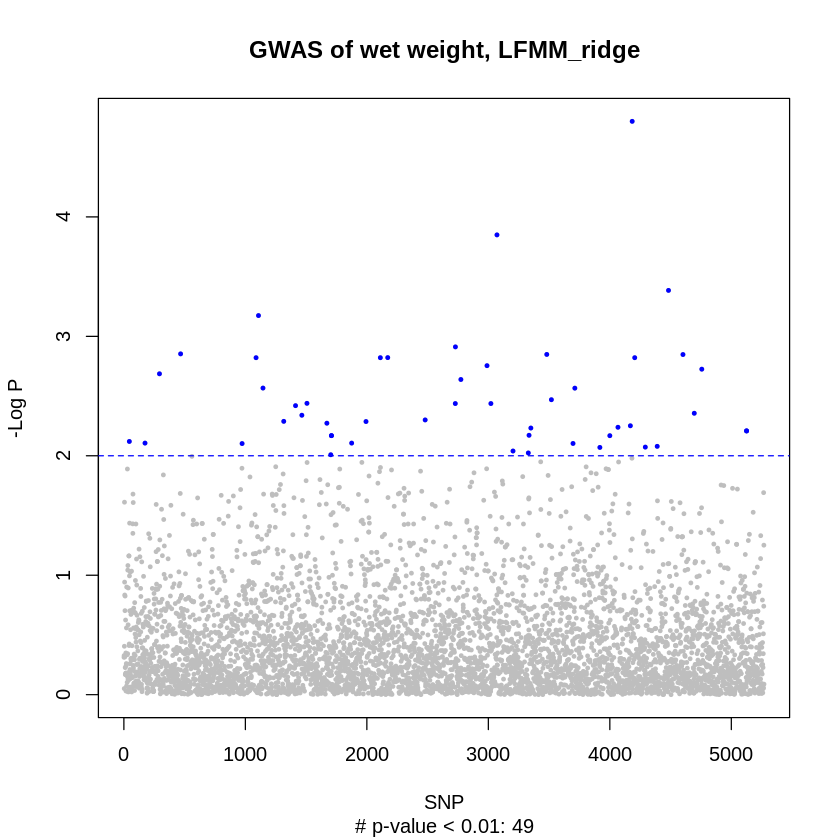

In [264]:
## Manhattan plot
x <- 1:length(pvalues_rW)

plot(-log10(pvalues_rW), 
      pch = 19, 
      cex = .4, 
      xlab = "SNP", ylab = "-Log P",
      col = "grey")

abline(h=-log10(0.01), col="blue", lty="dashed")
keep <- pvalues_rW < 0.01
keep[which(is.na(keep))] <- FALSE
ridgeP01W <- x[keep]
title("GWAS of wet weight, LFMM_ridge",
      sub=paste0("# p-value < 0.01: ",as.character(length(ridgeP01W))))
points(ridgeP01W,-log10(pvalues_rW[keep]), pch=19,cex=.4,col="blue")


In [155]:
pwd

/scratch/t.cri.ksilliman/CommonG/2019_Mapping/ANGSD_run/HCSS/GWAS


In [158]:
write.table(pvalues_r,"GWAS_weight_lfmmRidge.pvalues",row.names = T, col.names = T)

# Lasso estimates and GWAS with lfmm
More liberal test

In [265]:
# Fit an LFMM, i.e, compute B, U, V estimates
 mod.lfmm.lasso <- lfmm_lasso(Y = Y, 
                        X = X, 
                        K = 6,
                        nozero.prop = 0.01)

It = 1/100, err2 = 0.643349159118944
It = 2/100, err2 = 0.577328245387769
It = 3/100, err2 = 0.577410294583587
It = 4/100, err2 = 0.577453161506988
It = 5/100, err2 = 0.57746149480378
It = 6/100, err2 = 0.577462999002511
=== lambda = 0.502099098720345, no zero B proportion = 0.00702220535205921
It = 1/100, err2 = 0.577463265025642
It = 2/100, err2 = 0.577379385257812
It = 3/100, err2 = 0.57736783029336
It = 4/100, err2 = 0.577366125497997
=== lambda = 0.479277919774803, no zero B proportion = 0.00721199468589865
It = 1/100, err2 = 0.577365861380875
It = 2/100, err2 = 0.577283892797508
It = 3/100, err2 = 0.577272678484586
It = 4/100, err2 = 0.57727099387642
=== lambda = 0.457493998633132, no zero B proportion = 0.00816094135509584
It = 1/100, err2 = 0.577270723233401
It = 2/100, err2 = 0.577189804118896
It = 3/100, err2 = 0.577178609374099
It = 4/100, err2 = 0.577176906871591
=== lambda = 0.436700190327308, no zero B proportion = 0.00929967735813247
It = 1/100, err2 = 0.577176630465924


In [266]:
## performs association testing using the fitted model:
 pv <- lfmm_test(Y = Y, 
                 X = X, 
                 lfmm = mod.lfmm.lasso, 
                 calibrate = "gif")

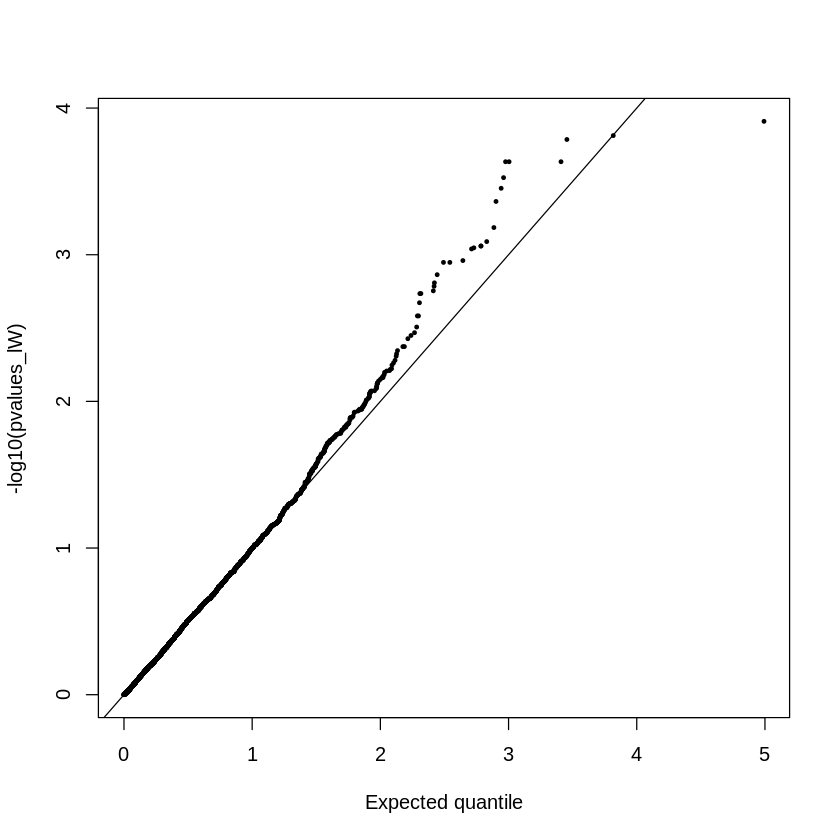

In [267]:
pvalues_lW <- pv$calibrated.pvalue 
qqplot(rexp(length(pvalues_lW), rate = log(10)),
       -log10(pvalues_lW), xlab = "Expected quantile",
       pch = 19, cex = .4)
abline(0,1)

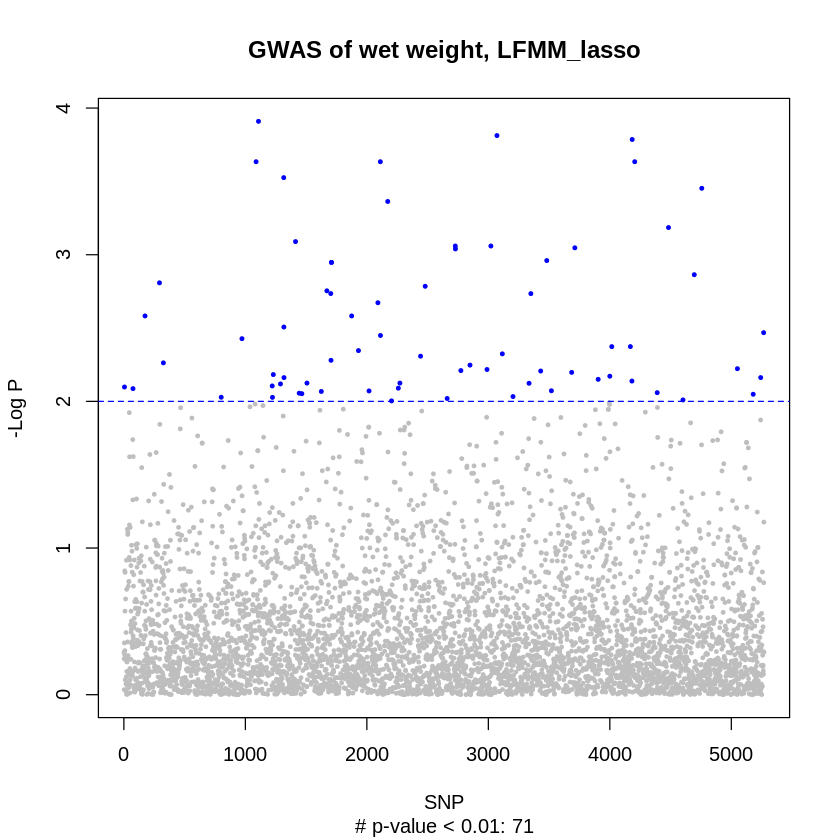

In [268]:
## Manhattan plot
xL <- 1:length(pvalues_lW)

plot(-log10(pvalues_lW), 
      pch = 19, 
      cex = .4, 
      xlab = "SNP", ylab = "-Log P",
      col = "grey")

abline(h=-log10(0.01), col="blue", lty="dashed")
keep <- pvalues_lW < 0.01
keep[which(is.na(keep))] <- FALSE
lassoP01W <- xL[keep]
title("GWAS of wet weight, LFMM_lasso",
      sub=paste0("# p-value < 0.01: ",as.character(length(lassoP01W))))
points(lassoP01W,-log10(pvalues_lW[keep]), pch=19,cex=.4,col="blue")


In [172]:
write.table(pvalues_l,"GWAS_weight_lfmmLasso.pvalues",row.names = T, col.names = T)

In [269]:
#SNPs identified by both methods 
both = intersect(rownames(pvalues_lW)[lassoP01W],rownames(pvalues_rW)[ridgeP01W])
write.table(both,"GWAS_weight_lfmmBothP01.pvalues",row.names = T, col.names = T)
length(both)
both

[1] 37

[1] "Contig793_22793"    "Contig1752_7704"    "Contig20301_25778" 
 [4] "Contig20556_1169"   "Contig23953_13742"  "Contig25187_18688" 
 [7] "Contig25896_4769"   "Contig26307_31575"  "Contig28951_24454" 
[10] "Contig29300_18485"  "Contig29459_8886"   "Contig29459_8891"  
[13] "Contig32428_12580"  "Contig36326_22771"  "Contig37341_12397" 
[16] "Contig43024_5264"   "Contig47156_8140"   "Contig47156_8144"  
[19] "Contig47842_5739"   "Contig52538_1318"   "Contig53370_3575"  
[22] "Contig54957_15652"  "Contig58145_4399"   "Contig61234_248"   
[25] "Contig61792_3239"   "Contig65054_11649"  "Contig65681_10897" 
[28] "Contig72135_1462"   "Contig82836_6883"   "Contig91596_1157"  
[31] "Contig92189_38401"  "Contig93748_2190"   "Contig103892_1489" 
[34] "Contig109827_6152"  "Contig120378_211"   "Contig130869_2254" 
[37] "Contig135601_12809"

In [270]:
#SNPs identified by at least 1 methods 
unW = union(rownames(pvalues_lW)[lassoP01W],rownames(pvalues_rW)[ridgeP01W])
#write.table(unW,"GWAS_weight_lfmmUnionP01.pvalues",row.names = T, col.names = T)
length(unW)

[1] 83

In [273]:
# Both length and width
unall <- intersect(un,unW)
write.table(unall,"GWAS_UnionWeightWidth_lfmmP01.pvalues",row.names = T, col.names = T)
length(unall)

[1] 44